In [1]:
import numpy as np
from math import *
import random as rd
import math as math
import matplotlib.pyplot as plt

def combinations(n, k):
    """ число сочетаний из n по k """
    return factorial(n)/(factorial(k) * factorial(n - k))

def normalize(array):
    """ нормализует значения массива, чтобы сумма элементов равнялась 1 """
    return array/ array.sum(axis=0)

n = 100 # количество возможных значений

X = np.arange(n+1) # возможные значения дискретной СВ
print('возможные значения дискретной СВ X:\n', X)

возможные значения дискретной СВ X:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


### Сложение двух случайных величин

In [2]:
# возьмем в рассмотрение две случайные величины X1 и X2:
x1 = [1, 2, 3, 4, 5]         # возможные значения X1
p1 = [.5, .2, .15, .1, .05]  # распределение вероятностей X2
x2 = [2, 4, 6, 8]            # возможные значения X2
p2 = [.2, .3, .1, .4]        # распределение вероятностей X2

# объединим в общий кортеж значения и распределения вероятностей:
X1 = (x1, p1)
X2 = (x2, p2)

# функция для получения суммы двух случайных величин X1 + X2
# (будет принимать два кортежа случаных величин):
def sumRV(X1, X2):
    x1 = X1[0] # x1 массив вожможных значений случайной величины X1
    x2 = X2[0] # x2 массив вожможных значений случайной величины X2
    p1 = X1[1] # # распределение вероятностей X1
    p2 = X2[1] # распределение вероятностей X2
    
    unionValuesTemp = np.empty(len(x1) * len(x2))
    # в этом массиве будут содержаться суммы кадого возможного значения
    # случайной величины X1 и каждого возможного значения X2
    
    unionProbsTemp = np.empty_like(unionValuesTemp, dtype='float32')
    # в этом массиве будут содержаться произведения вероятностей 
    # соответствующих слагаемых
    
    index = 0
    for i in range(len(x1)):
        for j in range(len(x2)):
            unionValuesTemp[index] = x1[i] + x2[j]
            unionProbsTemp[index] = p1[i] * p2[j]
            index += 1
    print('index', index)
    
    # теперь получим все пары индексов элементов unionValuesTem 
    # с одинаковыми значениями:
    pairs = []
    for i in range(len(unionValuesTemp)):
        for j in range(i+1, len(unionValuesTemp), 1):
            if unionValuesTemp[i] == unionValuesTemp[j]:
                pairs.append((i,j))
    print('pairs', len(pairs))
    # получим непсредтсвенно сами индексы первых элементов:
    firsts = np.empty(len(pairs))
    for i in range(len(pairs)):
        firsts[i] = pairs[i][0]
    firsts = np.unique(firsts)
    print('firsts', len(firsts))
    # длина результирущих массивов, которые будут содержать в себе
    # возможные значения случайной величины Y = X1 + X2 и распределение,
    # будет меньше длины unionValuesTemp ровно длину массива firsts:
    unionValues = np.empty(len(unionValuesTemp) - len(firsts))
    unionProbs = np.empty_like(unionValues)
    
    # в цикле будет происходить заполнение массивов unionValues и
    # unionProbs из unionValuesTemp и unionProbsTemp
    index = 0
    passing = [] # будет содержать элементы, которые стоит пропускать
    for i in range(len(unionValuesTemp)):
        prob = 0
        if not (i in firsts or i in passing):
            unionValues[index] = unionValuesTemp[i]
            unionProbs[index] = unionProbsTemp[i]
            index += 1
        elif (i in firsts) and (not i in passing):
            prob = unionProbsTemp[i]
            for j in range(len(pairs)):
                if i == pairs[j][0]:
                    prob += unionProbsTemp[pairs[j][1]]
                    passing.append(pairs[j][1])
            unionValues[index] = unionValuesTemp[i]
            unionProbs[index] = prob
            index +=1
    # функция возвращает кортеж, содержащий значения и распределени
    # функции Y = X1 + X2
    return (unionValues, unionProbs)

Y = sumRV(X1, X2)

print('union', Y[0])
print('probs', Y[1])

# функция суммирования произвольного числа случайных величин, на основе
# функции суммирования двух случайных величин

def plentySumRV(plenty):
    result = sumRV(plenty[0], plenty[1])
    for i in range(2, len(plenty)):
        result = sumRV(result, plenty[i])
    return result

x3 = [21, 34, 2, 38]            # возможные значения X2
p3 = [.24, .26, .1, .4]        # распределение вероятностей X2

X3 = (x3, p3)

Y2 = plentySumRV((X1, X2))

print('Y2', Y2)

index 20
pairs 11
firsts 9
union [ 3.  5.  7.  9.  4.  6.  8. 10. 11. 12. 13.]
probs [0.1        0.18000001 0.105      0.23       0.04       0.08
 0.05       0.09       0.065      0.04       0.02      ]
index 20
pairs 11
firsts 9
Y2 (array([ 3.,  5.,  7.,  9.,  4.,  6.,  8., 10., 11., 12., 13.]), array([0.1       , 0.18000001, 0.105     , 0.23      , 0.04      ,
       0.08      , 0.05      , 0.09      , 0.065     , 0.04      ,
       0.02      ]))


### Умножение двух случайных величин

In [3]:
# функция умножения аналогична функции сложения, за исключением
# одной строки, которая будет обозначена ***

def multRV(X1, X2):
    x1 = X1[0] # x1 массив вожможных значений случайной величины X1
    x2 = X2[0] # x2 массив вожможных значений случайной величины X2
    p1 = X1[1] # # распределение вероятностей X1
    p2 = X2[1] # распределение вероятностей X2
    
    unionValuesTemp = np.empty(len(x1) * len(x2))
    unionProbsTemp = np.empty_like(unionValuesTemp, dtype='float32')
    
    index = 0
    for i in range(len(x1)):
        for j in range(len(x2)):
            unionValuesTemp[index] = x1[i] * x2[j] # ***
            unionProbsTemp[index] = p1[i] * p2[j]
            index += 1
    
    pairs = []
    for i in range(len(unionValuesTemp)):
        for j in range(i+1, len(unionValuesTemp), 1):
            if unionValuesTemp[i] == unionValuesTemp[j]:
                pairs.append((i,j))
    
    firsts = np.empty(len(pairs))
    for i in range(len(pairs)):
        firsts[i] = pairs[i][0]
    firsts = np.unique(firsts)

    unionValues = np.empty(len(unionValuesTemp) - len(firsts))
    unionProbs = np.empty_like(unionValues)

    index = 0
    passing = []
    for i in range(len(unionValuesTemp)):
        prob = 0
        if not (i in firsts or i in passing):
            unionValues[index] = unionValuesTemp[i]
            unionProbs[index] = unionProbsTemp[i]
            index += 1
        elif (i in firsts) and (not i in passing):
            prob = unionProbsTemp[i]
            for j in range(len(pairs)):
                if i == pairs[j][0]:
                    prob += unionProbsTemp[pairs[j][1]]
                    passing.append(pairs[j][1])
            unionValues[index] = unionValuesTemp[i]
            unionProbs[index] = prob
            index +=1
    return (unionValues, unionProbs)

Z = multRV(X1, X2)

print('union', Z[0])
print('probs', Z[1])

union [ 2.  4.  6.  8. 12. 16. 18. 24. 32. 10. 20. 30. 40.]
probs [0.1   0.19  0.08  0.28  0.065 0.11  0.015 0.07  0.04  0.01  0.015 0.005
 0.02 ]


### Binomial distribution

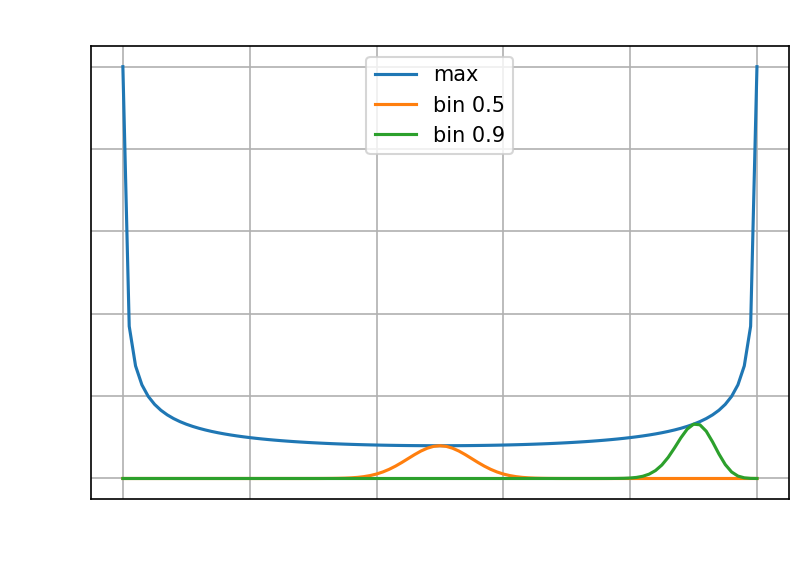

In [4]:
def binomial(n, p, k):
    return combinations(n, k) * (p**k) * ((1 - p)**(n - k))

binDist_1 = np.empty_like(X, dtype='float32')
binDist_2 = np.empty_like(X, dtype='float32')
binMax = np.empty_like(X, dtype='float32')

for i in range(n+1):
    binDist_1[i] = binomial(n, 0.5, i)
    binDist_2[i] = binomial(n, 0.9, i)
    # массивы содержат вероятности биномиального распределения
    # соответственно, при p = 0.5, и при p = 0.9
    
for i in range(n+1):
    binMax[i] = binomial(n, i/n, i)
    # максимальные значения распределений при разных p

plt.figure(dpi=150)
    
plt.plot(X, binMax, label='max')
plt.plot(X, binDist_1, label='bin 0.5')
plt.plot(X, binDist_2, label='bin 0.9')

plt.xlabel('k', color='white')
plt.ylabel('P(k)', color='white')
plt.title('Binomial distribution', color='w')
plt.grid()

plt.tick_params(color='white', labelcolor='white')

plt.legend()
plt.show()

### Normal distribution $\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

In [5]:
def normalDist(a, sigma, i):
    exp = math.exp(-((i - a)**2/2*sigma**2))
    multipler = 1 / sigma * math.sqrt(2 * math.pi)
    return multipler * exp

normDistProb_1 = np.empty_like(X, dtype='float32')
a = 50 # математическое ожидание
sigma = 0.1 # среднеквадратичное отклонение
for i in range(len(normDistProb_1)):
    normDistProb_1[i] = normalDist(a, sigma, i)

normDistProb_1 = normalize(normDistProb_1) # нормализация
# теперь массив normalDistProb_1 содержит вероятности нормального распределения
# с параметрами a = 50 и sigma = 0.1

normDist_1 = (X, normDistProb_1) # случайная величина с нормальным распределением

# еще две случайные величины с тем же распределением:
normDist_2 = (X, normDistProb_1)
normDist_3 = (X, normDistProb_1)
# все три случайные величины независимы

# тогда срерднее арифметическое трех взаимно независмиых 

sumDist = plentySumRV((normDist_1, normDist_2, normDist_3))
arithMean = (sumDist[0] / 3, sumDist[1])
print(arithMean[0])

index 10201
pairs 338350
firsts 10000
index 20301
pairs 843350
firsts 20000
[  0.           0.33333333   0.66666667   1.           1.33333333
   1.66666667   2.           2.33333333   2.66666667   3.
   3.33333333   3.66666667   4.           4.33333333   4.66666667
   5.           5.33333333   5.66666667   6.           6.33333333
   6.66666667   7.           7.33333333   7.66666667   8.
   8.33333333   8.66666667   9.           9.33333333   9.66666667
  10.          10.33333333  10.66666667  11.          11.33333333
  11.66666667  12.          12.33333333  12.66666667  13.
  13.33333333  13.66666667  14.          14.33333333  14.66666667
  15.          15.33333333  15.66666667  16.          16.33333333
  16.66666667  17.          17.33333333  17.66666667  18.
  18.33333333  18.66666667  19.          19.33333333  19.66666667
  20.          20.33333333  20.66666667  21.          21.33333333
  21.66666667  22.          22.33333333  22.66666667  23.
  23.33333333  23.66666667  24.         

301 301


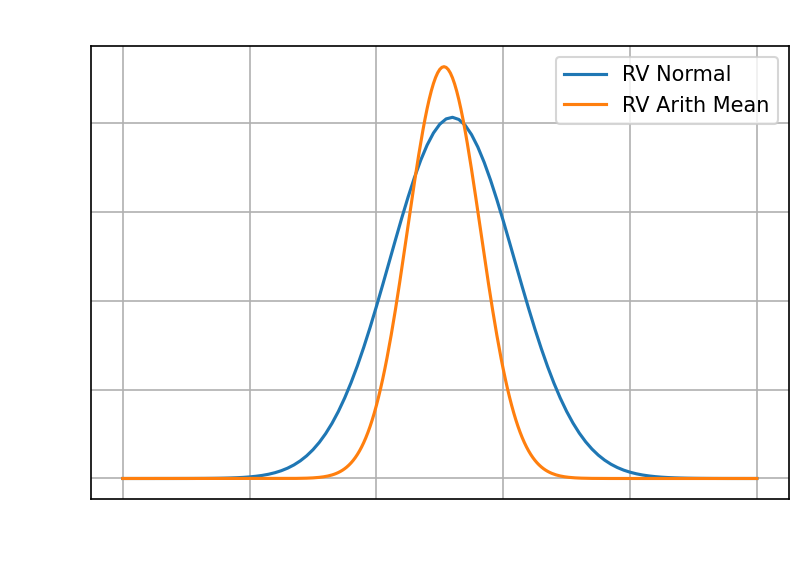

In [6]:
plt.figure(dpi=150)
arithMean = (arithMean[0] * 2, arithMean[1])
print(len(arithMean[0]), len(arithMean[1]))
Xalt = np.arange(301) / 3
plt.plot(X, normDist_1[0] * normDist_1[1], label='RV Normal')
plt.plot(Xalt, arithMean[0] * arithMean[1], label='RV Arith Mean')

plt.xlabel('k', color='white')
plt.ylabel('P(k)', color='white')
plt.title('Binomial distribution', color='w')
plt.grid()

plt.tick_params(color='white', labelcolor='white')

plt.legend()
plt.show()

In [7]:
array = np.arange(10)


$\frac{1}{\sigma\sqrt{2\pi}}
   \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

In [9]:
import numpy as np
from scipy.special import gamma

t = np.empty(10)
for i in range(10):
    t[i] = 1 / (10 * np.power(2, i))
print('t\n',t)

tPowered = np.power(t, 4)
print('\nt powered\n',tPowered)

gammaValue = gamma(5.9)
print('\ngamma =', gammaValue)

result = tPowered * (gammaValue / 24)
print('\nresult\n',result)

t
 [0.1        0.05       0.025      0.0125     0.00625    0.003125
 0.0015625  0.00078125 0.00039063 0.00019531]

t powered
 [1.00000000e-04 6.25000000e-06 3.90625000e-07 2.44140625e-08
 1.52587891e-09 9.53674316e-11 5.96046448e-12 3.72529030e-13
 2.32830644e-14 1.45519152e-15]

gamma = 101.27019121310353

result
 [4.21959130e-04 2.63724456e-05 1.64827785e-06 1.03017366e-07
 6.43858536e-09 4.02411585e-10 2.51507241e-11 1.57192025e-12
 9.82450158e-14 6.14031349e-15]
